In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR

In [19]:
dataset=pd.read_csv("Position_Salaries.csv")
X=dataset.iloc[:,1:-1].values
y_also=dataset.iloc[:,-1:].values#this method is simpler than reshaping the y
y_temp=dataset.iloc[:,-1].values
y=dataset.iloc[:,-1].values
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Position  10 non-null     object
 1   Level     10 non-null     int64 
 2   Salary    10 non-null     int64 
dtypes: int64(2), object(1)
memory usage: 368.0+ bytes


In [20]:
X

array([[ 1],
       [ 2],
       [ 3],
       [ 4],
       [ 5],
       [ 6],
       [ 7],
       [ 8],
       [ 9],
       [10]], dtype=int64)

In [21]:
y=y.reshape(len(y),1)
y

array([[  45000],
       [  50000],
       [  60000],
       [  80000],
       [ 110000],
       [ 150000],
       [ 200000],
       [ 300000],
       [ 500000],
       [1000000]], dtype=int64)

In [22]:
sc_X=StandardScaler()
X=sc_X.fit_transform(X)
#the sc variable can not used for other features beacuse it calculated the mean etc acc to the X
sc_y=StandardScaler()
y=sc_y.fit_transform(y)

In [23]:
X

array([[-1.5666989 ],
       [-1.21854359],
       [-0.87038828],
       [-0.52223297],
       [-0.17407766],
       [ 0.17407766],
       [ 0.52223297],
       [ 0.87038828],
       [ 1.21854359],
       [ 1.5666989 ]])

In [24]:
y

array([[-0.72004253],
       [-0.70243757],
       [-0.66722767],
       [-0.59680786],
       [-0.49117815],
       [-0.35033854],
       [-0.17428902],
       [ 0.17781001],
       [ 0.88200808],
       [ 2.64250325]])

In [25]:
regressor=SVR(kernel='rbf')
regressor.fit(X,y)

c:\Users\ajair\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR()

In [26]:
#inv transform takes 2 2d array
#reg predict returns 1d array so one [] is required or reshape will convert it into [[6.5]]
sc_y.inverse_transform(regressor.predict(sc_X.transform([[6.5]])).reshape(1,1))

array([[170370.0204065]])

In [27]:
regressor.predict(X)


array([-0.6197853 , -0.62924694, -0.56788994, -0.49732233, -0.44690338,
       -0.36617206, -0.14115569,  0.28557658,  0.78226531,  1.08559794])

In [28]:
regressor.predict(X).reshape(len(X),1)

array([[-0.6197853 ],
       [-0.62924694],
       [-0.56788994],
       [-0.49732233],
       [-0.44690338],
       [-0.36617206],
       [-0.14115569],
       [ 0.28557658],
       [ 0.78226531],
       [ 1.08559794]])

In [29]:
y_pred=sc_y.inverse_transform(regressor.predict(X).reshape(len(X),1))
y_pred.shape

(10, 1)

In [30]:
X_org=sc_X.inverse_transform(X)
y_org=sc_y.inverse_transform(y)
print(X_org.shape)
print(y_org.shape)

(10, 1)
(10, 1)


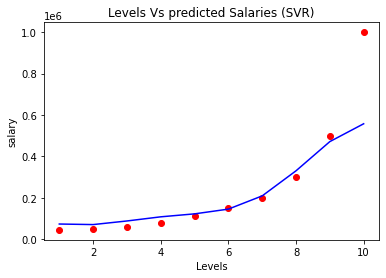

In [31]:
plt.scatter(X_org,y_org,color="red")
plt.plot(X_org,y_pred,color ="blue")
plt.title("Levels Vs predicted Salaries (SVR)")
plt.xlabel('Levels')
plt.ylabel("salary")
plt.show()

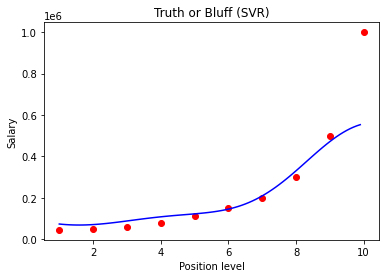

In [32]:
X_grid = np.arange(min(X_org), max(X_org), 0.1)
X_grid = X_grid.reshape((len(X_grid), 1))
plt.scatter(X_org, y_org, color = 'red')
plt.plot(X_grid, sc_y.inverse_transform(regressor.predict(sc_X.transform(X_grid)).reshape(len(X_grid),1)), color = 'blue')
plt.title('Truth or Bluff (SVR)')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()

In [33]:
print(y_pred)
print(y_org)

[[ 73474.15615697]
 [ 70786.94584626]
 [ 88213.00902103]
 [108254.98574956]
 [122574.52250599]
 [145503.10688572]
 [209410.23132923]
 [330606.89204569]
 [471671.95587315]
 [557821.75899897]]
[[  45000.]
 [  50000.]
 [  60000.]
 [  80000.]
 [ 110000.]
 [ 150000.]
 [ 200000.]
 [ 300000.]
 [ 500000.]
 [1000000.]]


In [34]:
from sklearn.metrics import r2_score
accu=r2_score(y_org,y_pred)
accu*100

75.16001070620798